Importing the libraries and loading the data

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customersData = pd.read_excel('CustomersData.xlsx')
discountCoupon = pd.read_csv('Discount_Coupon.csv')
marketingSpend = pd.read_csv('Marketing_Spend.csv')
onlineSales = pd.read_csv('Online_Sales.csv')
taxAmount = pd.read_excel('Tax_amount.xlsx') 

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 1__

Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?

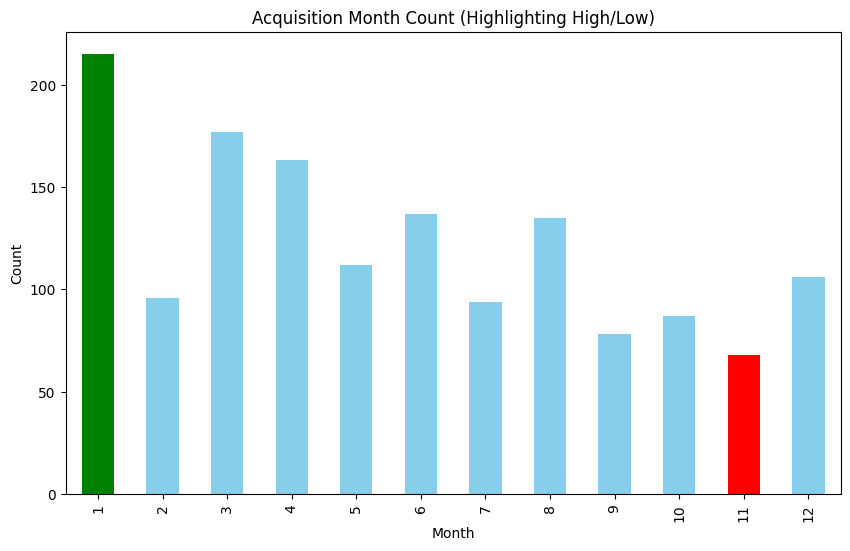

In [161]:

# Merging the data from online sales and customers data on customer id 
customerOnlineSales = pd.merge(onlineSales, customersData, on='CustomerID')
customerOnlineSales['Transaction_Date'] = pd.to_datetime(customerOnlineSales['Transaction_Date'])

# Extracting the month from the transaction date
customerOnlineSales['Transaction_Month'] = customerOnlineSales['Transaction_Date'].dt.month

# After converting the Transaction_Date column to datetime, we can calculate the initial purchase date for each customer by 
# grouping the data by CustomerID and selecting the minimum Transaction_Date by CustomerID and selecting the minimum Transaction_Date
# We can then extract the month from this date to get the acquisition month.

initialPurchase = customerOnlineSales.groupby('CustomerID')['Transaction_Date'].min()
acquisitionMonth = initialPurchase.dt.month

acquisitionMonthCount = acquisitionMonth.value_counts().sort_index()
highestAcquisitionMonth = acquisitionMonthCount.idxmax()
lowestAcquisitionMonth = acquisitionMonthCount.idxmin()
colors = ['skyblue' if month not in [highestAcquisitionMonth, lowestAcquisitionMonth]
          else 'green' if month == highestAcquisitionMonth else 'red'
          for month in acquisitionMonthCount.index]
acquisitionMonthCount.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Acquisition Month Count (Highlighting High/Low)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Hence we can say that the highest acquisition month is January and the lowest acquisition month is November.

Strategy Recommendations for Consistent Acquisition Across the Year

To smooth customer acquisition throughout the year, focus on boosting engagement during low-performing months (like September to November) with seasonal promotions and personalized campaigns. Analyze top-performing months (e.g., January, March, April) and replicate successful tactics such as optimized ads or content timing. Maintain year-round visibility using consistent email marketing, retargeting ads, and a planned content calendar. Segment customers by behavior, location, or demographics to personalize acquisition strategies. 

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

**Question 2**

Analyze the data to determine if certain months consistently show higher or lower acquisition rates. How can the company capitalize on high-performing months and improve performance during slower periods?


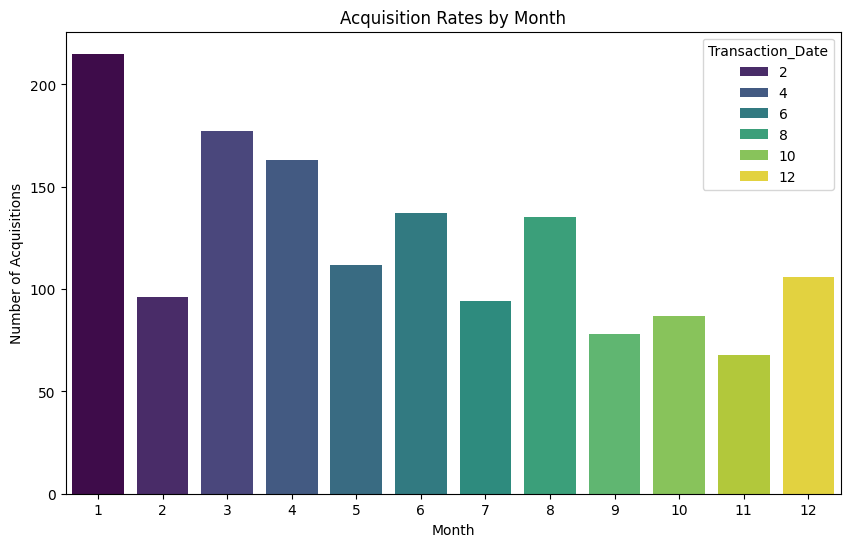

The highest acquisition month is 1 with 215 acquisitions
The lowest acquisition month is 11 with 68 acquisitions


In [162]:
customerOnlineSales['Transaction_Month'] = customerOnlineSales['Transaction_Date'].dt.month

initialPurchase = customerOnlineSales.groupby('CustomerID')['Transaction_Date'].min()
acquisitionMonth = initialPurchase.dt.month

acquisitionMonthCount = acquisitionMonth.value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=acquisitionMonthCount.index, y=acquisitionMonthCount.values, palette='viridis',hue=acquisitionMonthCount.index)
plt.xlabel('Month')
plt.ylabel('Number of Acquisitions')
plt.title('Acquisition Rates by Month')
plt.show()

highestAcquisitionMonth = acquisitionMonthCount.idxmax()
lowestAcquisitionMonth = acquisitionMonthCount.idxmin()

print(f'The highest acquisition month is {highestAcquisitionMonth} with {acquisitionMonthCount.max()} acquisitions')
print(f'The lowest acquisition month is {lowestAcquisitionMonth} with {acquisitionMonthCount.min()} acquisitions')



The highest acquisition month is January with 215 acquisitions.
The lowest acquisition month is November with 68 acquisitions.
The company can capitalize on high-performing months by increasing marketing efforts during those periods(Jan to June).
Additionally, the company can improve performance during slower periods by offering promotions and discounts during those times(July to Dec).

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 3__

Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

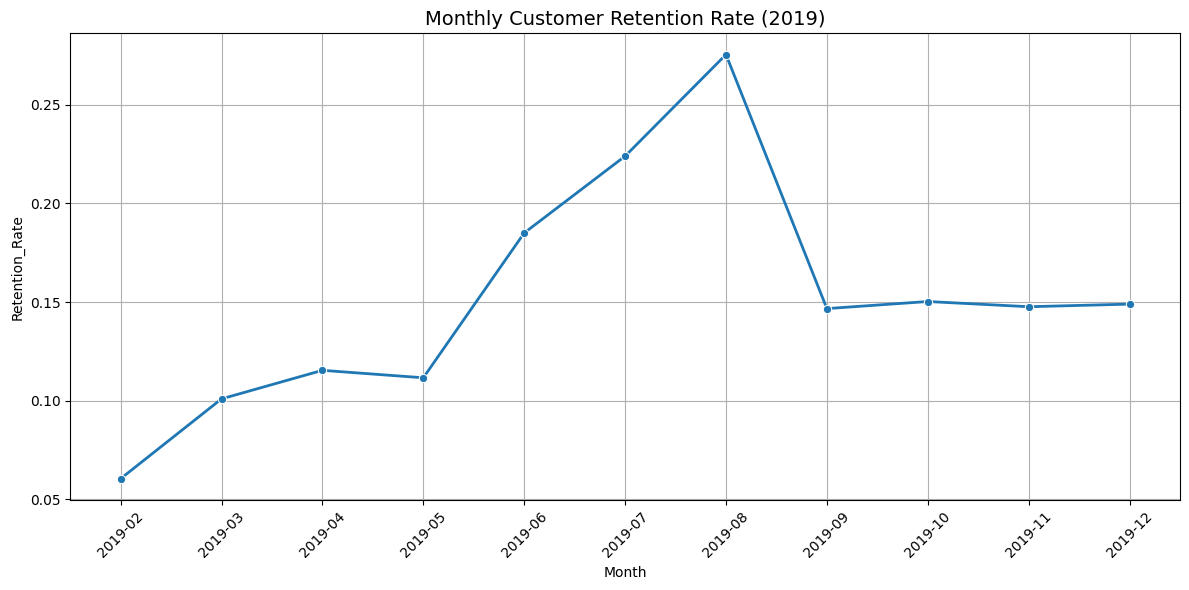

Month with highest retention rate: August with retention rate of 27.54237288135593%
Month with lowest retention rate: February with retention rate of 6.046511627906977%


In [163]:
onlineSales['Transaction_Date'] = pd.to_datetime(onlineSales['Transaction_Date'])
onlineSales['YearMonth'] = onlineSales['Transaction_Date'].dt.to_period('M')
monthly_customers = onlineSales.groupby('YearMonth')['CustomerID'].apply(set)
retentionRate = []
months = monthly_customers.index.to_list()

for i in range(1, len(months)):
    previousMonth = months[i - 1]
    currentMonth = months[i]
    
    previousCustomers = monthly_customers[previousMonth]
    currentCustomers = monthly_customers[currentMonth]
    
    retained = len(previousCustomers & currentCustomers)
    totalPrevious = len(previousCustomers)
    
    retention = retained / totalPrevious if totalPrevious > 0 else np.nan
    
    retentionRate.append({
        'Month': str(currentMonth),
        'Retention_Rate': retention
    })

retentionRateData = pd.DataFrame(retentionRate)

plt.figure(figsize=(12, 6))
sns.lineplot(data=retentionRateData, x='Month', y='Retention_Rate', marker='o', linewidth=2)
plt.title('Monthly Customer Retention Rate (2019)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

retentionRateData['Month'] = pd.to_datetime(retentionRateData['Month'])

strongest_month = retentionRateData.loc[retentionRateData['Retention_Rate'].idxmax()]
weakest_month = retentionRateData.loc[retentionRateData['Retention_Rate'].idxmin()]

print(f"Month with highest retention rate: {strongest_month['Month'].strftime('%B')} "
      f"with retention rate of {strongest_month['Retention_Rate'] * 100}%")

print(f"Month with lowest retention rate: {weakest_month['Month'].strftime('%B')} "
      f"with retention rate of {weakest_month['Retention_Rate'] * 100}%")


From the graph we can see that the month with highest retention rate is August and the month with lowest retention rate is February.

In [164]:
#Analysis 1
marketingSpend['Date'] = pd.to_datetime(marketingSpend['Date'])
marketingSpend['Month'] = marketingSpend['Date'].dt.to_period('M')

augustSpend = marketingSpend[marketingSpend['Month'] == '2019-08']
februarySpend = marketingSpend[marketingSpend['Month'] == '2019-02']

print("August Spend:\n", augustSpend[['Offline_Spend', 'Online_Spend']].sum())
print("\nFebruary Spend:\n", februarySpend[['Offline_Spend', 'Online_Spend']].sum())

August Spend:
 Offline_Spend    85500.00
Online_Spend     57404.15
dtype: float64

February Spend:
 Offline_Spend    81300.00
Online_Spend     55807.92
dtype: float64


In [165]:
# Analysis 2
augustDiscounts = discountCoupon[discountCoupon['Month'] == 'Aug']
februaryDiscounts = discountCoupon[discountCoupon['Month'] == 'Feb']

print("August Avg Discount (%):", augustDiscounts['Discount_pct'].mean())
print("February Avg Discount (%):", februaryDiscounts['Discount_pct'].mean())

August Avg Discount (%): 20.0
February Avg Discount (%): 20.0


From the above two analysis we can see that:
February and August offered the same average discount (20%) and have similar marketing spend, yet August had a much higher retention rate (27.5% vs 6.0%).
This suggests neither discounts nor marketing spend didn't drive retention; other factors may have played a larger role.
To improve February retention,we should try to replicate successful August strategies—especially in marketing execution, not just discount size.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 4__

Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.


In [166]:
highMonth = '2019-08'
lowMonth = '2019-02'


def repeatPurchaseRate(data, month):
    month_data = data[data['YearMonth'] == month]
    purchase_counts = month_data.groupby('CustomerID')['Transaction_ID'].nunique()
    repeat_customers = purchase_counts[purchase_counts > 1].count()
    total_customers = purchase_counts.count()
    return repeat_customers / total_customers if total_customers else 0

highRepeatRate = repeatPurchaseRate(onlineSales, highMonth)
lowRepeatRate = repeatPurchaseRate(onlineSales, lowMonth)

print(f"Repeat purchase rate in {highMonth}: {highRepeatRate:.2%}")
print(f"Repeat purchase rate in {lowMonth}: {lowRepeatRate:.2%}\n")

def top_categories(data, month):
    month_data = data[data['YearMonth'] == month]
    category_sales = month_data.groupby('Product_Category')['Quantity'].sum().sort_values(ascending=False)
    return category_sales.head()

print("Top categories in high retention month:")
print(top_categories(onlineSales, highMonth))

print("\nTop categories in low retention month:")
print(top_categories(onlineSales, lowMonth))

Repeat purchase rate in 2019-08: 83.67%
Repeat purchase rate in 2019-02: 89.91%

Top categories in high retention month:
Product_Category
Office                  8076
Apparel                 3950
Drinkware               3900
Notebooks & Journals    2677
Lifestyle               2366
Name: Quantity, dtype: int64

Top categories in low retention month:
Product_Category
Office       6389
Bags         2151
Lifestyle    2062
Drinkware    1866
Nest-USA     1638
Name: Quantity, dtype: int64


The above analysis shows that while repeat purchase rates remain high even in low-retention months, overall retention varies, likely due to differences in new customer acquisition. The variation in top-selling product categories between high and low retention months suggests that seasonal preferences strongly influence customer buying behavior. Categories like Apparel and Notebooks & Journals perform better in high-retention months, indicating customer demand shifts throughout the year. Therefore, tailoring marketing and promotions to align with these seasonal preferences can help improve retention during weaker months.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 5__

Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

Customer_Type   Existing        New
Month                              
2019-01             0.00  462866.90
2019-02         45272.03  314764.37
2019-03         68294.39  342113.64
2019-04        181160.67  261939.49
2019-05        126001.97  223157.62


<Figure size 1200x600 with 0 Axes>

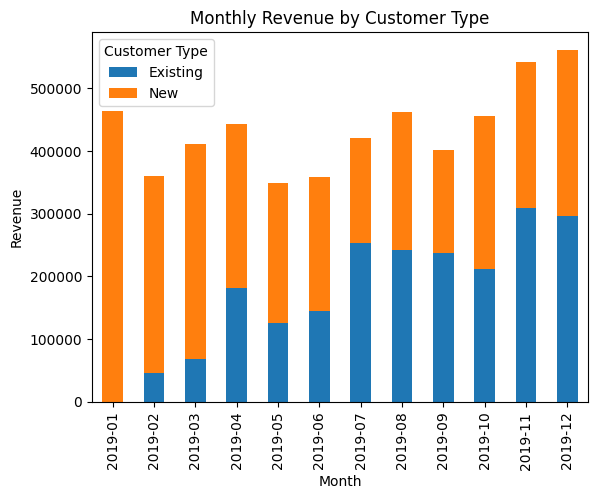

In [167]:
onlineSales = pd.read_csv('Online_Sales.csv')
onlineSales['Transaction_Date'] = pd.to_datetime(onlineSales['Transaction_Date'])
first_purchase = onlineSales.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchase['First_Month'] = first_purchase['Transaction_Date'].dt.to_period('M').astype(str)

onlineSales = pd.merge(onlineSales, first_purchase[['CustomerID', 'First_Month']], on='CustomerID', how='left')

onlineSales['Month'] = onlineSales['Transaction_Date'].dt.to_period('M').astype(str)

# Assign Customer Type: New if first purchase is in that month, else Existing
onlineSales['Customer_Type'] = onlineSales.apply(lambda row: 'New' if row['Month'] == row['First_Month'] else 'Existing', axis=1)

onlineSales['Revenue'] = (onlineSales['Quantity'] * onlineSales['Avg_Price']) + onlineSales['Delivery_Charges']

monthly_revenue = onlineSales.groupby(['Month', 'Customer_Type'])['Revenue'].sum().reset_index()
pivot_df = monthly_revenue.pivot(index='Month', columns='Customer_Type', values='Revenue').fillna(0)
print(pivot_df.head())

plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Monthly Revenue by Customer Type')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Customer Type')
plt.show()


The trend shows that the business excels in customer retention, evidenced by a high repeat purchase rate of 83-89% among existing customers. However, the business experiences challenges in new customer acquisition and initial retention, reflected by the wide variation in monthly retention rates (27.5% in August vs. 6% in February).

This suggests that while retention efforts are strong and effective, the company needs to rebalance its focus by enhancing acquisition strategies, particularly by improving onboarding and early engagement of new customers. Investing in tailored onboarding experiences, personalized communication, and targeted promotions for new customers could help boost their retention and create a more sustainable growth cycle.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 6__

Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

In [168]:
onlineSales['Revenue'] = onlineSales['Quantity'] * onlineSales['Avg_Price'] + onlineSales['Delivery_Charges']
revenue_comparison = onlineSales.groupby('Coupon_Status')['Revenue'].agg(['sum', 'mean', 'count']).reset_index()
print(revenue_comparison) 

  Coupon_Status         sum        mean  count
0       Clicked  2662820.28   98.894016  26926
1      Not Used   816306.71  100.853312   8094
2          Used  1748302.70   97.648721  17904


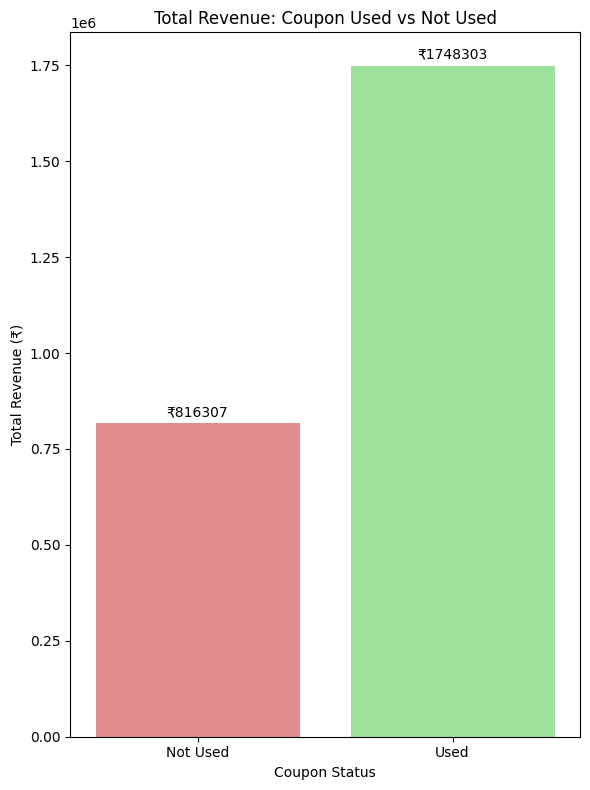

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only 'Used' and 'Not Used'
filtered_revenue = revenue_comparison[revenue_comparison['Coupon_Status'].isin(['Used', 'Not Used'])]

# Set custom colors for the two statuses
color_map = {
    'Used': 'lightgreen',       
    'Not Used': 'lightcoral'    
}

# Plot
plt.figure(figsize=(6, 8))
ax = sns.barplot(
    data=filtered_revenue,
    x='Coupon_Status',
    y='sum',
    hue='Coupon_Status',
    palette=color_map,
    legend=False
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='₹%.0f', label_type='edge', padding=3)

# Basic titles and labels
plt.title('Total Revenue: Coupon Used vs Not Used')
plt.xlabel('Coupon Status')
plt.ylabel('Total Revenue (₹)')
plt.tight_layout()
plt.show()


The data shows that coupon usage is associated with significantly higher total revenue and transaction volume. Transactions with coupons contributed over twice the revenue compared to those without, indicating that discounts effectively drive purchase frequency. However, the average revenue per transaction is slightly lower when coupons are used, suggesting reduced margins. This implies that while coupons boost sales volume, they attract more price-sensitive customers who spend less per order.

To optimize discount strategies for better revenue and profitability balance, businesses should focus on targeting discounts to specific customer segments like new or infrequent buyers. Implementing minimum cart values for coupon eligibility can help increase average order sizes. Discounts should also be reserved for low-performing months or product categories, rather than used universally. Lastly, offering alternatives such as bundles or loyalty rewards can encourage spending while preserving overall profitability.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 7__

Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

In [170]:
onlineSales['Revenue'] = onlineSales['Quantity'] * onlineSales['Avg_Price'] + onlineSales['Delivery_Charges']
product_revenue = onlineSales.groupby('Product_Description')['Revenue'].sum().sort_values(ascending=False).reset_index()
top_products = product_revenue.head(10)


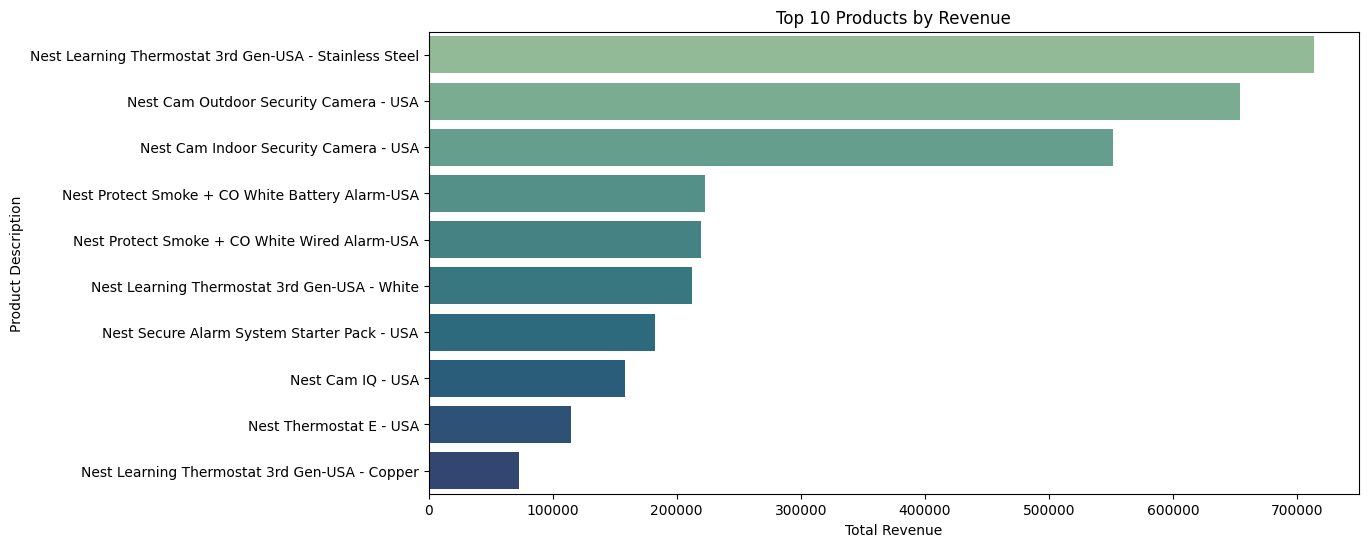

In [171]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, x='Revenue', y='Product_Description', palette='crest', hue='Product_Description')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.show()


In [172]:
onlineSales['Month'] = pd.to_datetime(onlineSales['Transaction_Date']).dt.month
monthly_category_sales = onlineSales.groupby(['Month', 'Product_Category'])['Revenue'].sum().reset_index()
top_product_coupons = onlineSales[onlineSales['Product_Description'].isin(top_products['Product_Description'])] \
    .groupby(['Product_Description', 'Coupon_Status'])['Revenue'].sum().unstack().fillna(0)

merged = pd.merge(onlineSales, customersData, on='CustomerID')
top_customer_profile = merged[merged['Product_Description'].isin(top_products['Product_Description'])] \
    .groupby(['Product_Description', 'Gender', 'Location'])['Revenue'].sum().reset_index()


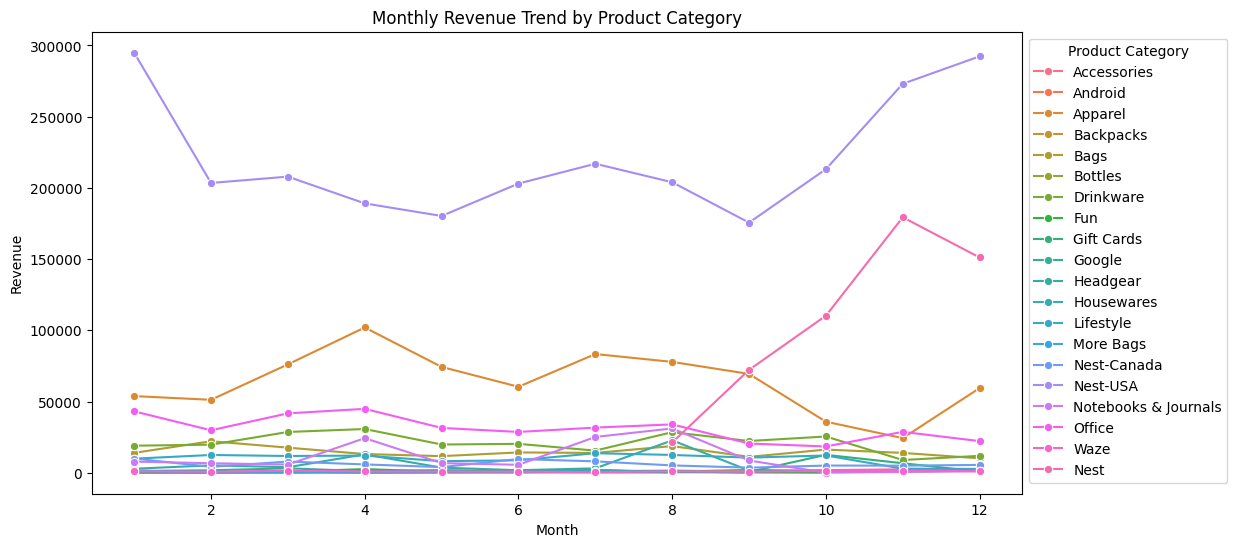

In [173]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_category_sales, x='Month', y='Revenue', hue='Product_Category', marker='o')
plt.title('Monthly Revenue Trend by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [174]:
print("Monthly revenue by category (for heatmap):")
print(monthly_category_sales.pivot(index='Product_Category', columns='Month', values='Revenue'))
print("\nRaw monthly_category_sales data (for line plot):")
print(monthly_category_sales.sort_values(by=['Product_Category', 'Month']))

Monthly revenue by category (for heatmap):
Month                        1          2          3          4          5   \
Product_Category                                                              
Accessories               58.07        NaN      66.49     191.96     190.97   
Android                  100.24      26.49     242.22      52.98     121.95   
Apparel                53831.06   51215.94   76105.78  101988.41   74306.92   
Backpacks                309.21     606.22     738.22    1191.44    1565.82   
Bags                   13966.20   22117.93   17635.02   13134.33   11669.82   
Bottles                 1080.43     568.11     710.92     745.12    1506.89   
Drinkware              19010.96   19715.75   28638.74   30711.43   19829.87   
Fun                      408.94     454.30     898.86    2538.29     805.93   
Gift Cards               283.69     400.00     375.00     725.00    1325.00   
Google                  1245.71    1722.13    3129.64    1141.61    1649.85   
Headgear 

The success of top-performing product categories such as Nest-USA, Apparel, and Office appears to be driven by a mix of high product value, consistent demand, and potential seasonal influence. Premium offerings like Nest-USA contribute significantly to revenue despite possibly lower unit volumes. Apparel and Office items show steady performance, likely due to recurring utility and relevance in both personal and professional contexts. Peaks in certain months suggest that well-timed promotions, campaigns, or seasonal preferences also play a major role in boosting sales for these categories.

This insight can guide inventory management by ensuring that high-performing categories like Nest-USA, Apparel, and Office are well-stocked ahead of peak months, reducing the risk of stockouts during high demand. Understanding seasonal trends allows businesses to forecast demand more accurately and optimize storage costs. For promotional strategies, timing is key—campaigns can be aligned with historically strong sales periods, and underperforming months can be targeted with strategic promotions to stimulate demand. Moreover, resources can be focused on categories with proven ROI, while experimenting with discounts or bundling to lift lower-tier products.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 8__

Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

Monthly Marketing Spend vs Revenue and ROI:

    Month  Total_Spend    Revenue       ROI
0       1    154928.95  462866.90  1.987608
1       2    137107.92  360036.40  1.625934
2       3    122250.09  410408.03  2.357118
3       4    157026.83  443100.16  1.821812
4       5    118259.64  349159.59  1.952483
5       6    134318.14  358594.96  1.669743
6       7    120217.85  421362.00  2.504987
7       8    142904.15  462309.94  2.235105
8       9    135514.54  401553.82  1.963179
9      10    151224.65  455643.16  2.013022
10     11    161144.96  541254.55  2.358805
11     12    198648.75  561140.18  1.824786

The Average ROI is:  2.026215203733578

Months with Higher than Average ROI:
     Month       ROI
2       3  2.357118
6       7  2.504987
7       8  2.235105
10     11  2.358805

Months with Lower than Average ROI:
     Month       ROI
0       1  1.987608
1       2  1.625934
3       4  1.821812
4       5  1.952483
5       6  1.669743
8       9  1.963179
9      10  2.013022
11    

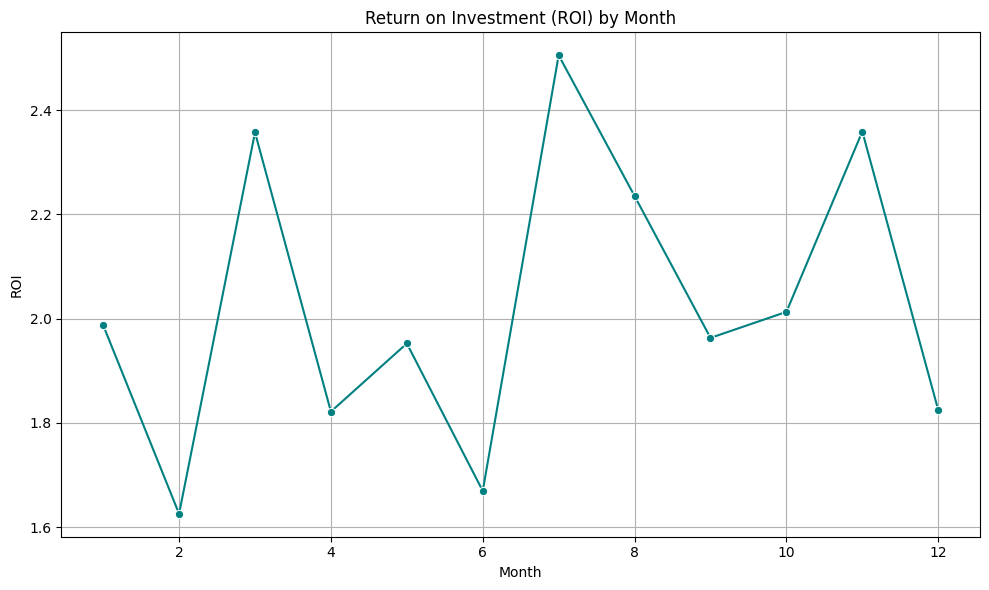

In [175]:

marketingSpend['Date'] = pd.to_datetime(marketingSpend['Date'])
marketingSpend['Month'] = marketingSpend['Date'].dt.month

monthly_marketing = marketingSpend.groupby('Month')[['Offline_Spend', 'Online_Spend']].sum().reset_index()
monthly_marketing['Total_Spend'] = monthly_marketing['Offline_Spend'] + monthly_marketing['Online_Spend']

onlineSales['Transaction_Date'] = pd.to_datetime(onlineSales['Transaction_Date'])
onlineSales['Month'] = onlineSales['Transaction_Date'].dt.month
onlineSales['Revenue'] = onlineSales['Quantity'] * onlineSales['Avg_Price'] + onlineSales['Delivery_Charges']
monthly_revenue = onlineSales.groupby('Month')['Revenue'].sum().reset_index()

marketing_vs_revenue = pd.merge(monthly_marketing, monthly_revenue, on='Month')
marketing_vs_revenue['ROI'] = (marketing_vs_revenue['Revenue'] - marketing_vs_revenue['Total_Spend']) / marketing_vs_revenue['Total_Spend']

print("Monthly Marketing Spend vs Revenue and ROI:\n")
print(marketing_vs_revenue[['Month', 'Total_Spend', 'Revenue', 'ROI']])

high_roi_months = marketing_vs_revenue[marketing_vs_revenue['ROI'] > marketing_vs_revenue['ROI'].mean()]
low_roi_months = marketing_vs_revenue[marketing_vs_revenue['ROI'] < marketing_vs_revenue['ROI'].mean()]

print("\nThe Average ROI is: ", marketing_vs_revenue['ROI'].mean())
print("\nMonths with Higher than Average ROI:\n", high_roi_months[['Month', 'ROI']])
print("\nMonths with Lower than Average ROI:\n", low_roi_months[['Month', 'ROI']])

plt.figure(figsize=(10,6))
sns.lineplot(data=marketing_vs_revenue, x='Month', y='ROI', marker='o', color='teal')
plt.title('Return on Investment (ROI) by Month')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.grid(True)
plt.tight_layout()
plt.show()


High returns:

July (2.50), March (2.36), November (2.36), and August (2.24) stand out as especially efficient months where marketing spend generated significantly higher returns compared to the average ROI (~2.03).

Low returns:

February (1.63), June (1.67), and December (1.82) show lower but still positive returns. These months had the least efficient marketing in terms of profit generated per dollar spent.



To improve ROI, marketing strategies should focus on optimizing campaign timing and targeting, especially during months with lower returns. Leveraging data-driven insights to personalize offers and choose high-performing channels can boost engagement and conversions. Additionally, reallocating budget towards campaigns and months that historically yield higher ROI can maximize efficiency. Testing new creative approaches and continuously measuring performance will help fine-tune strategies for better profitability over time.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 9__

Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?

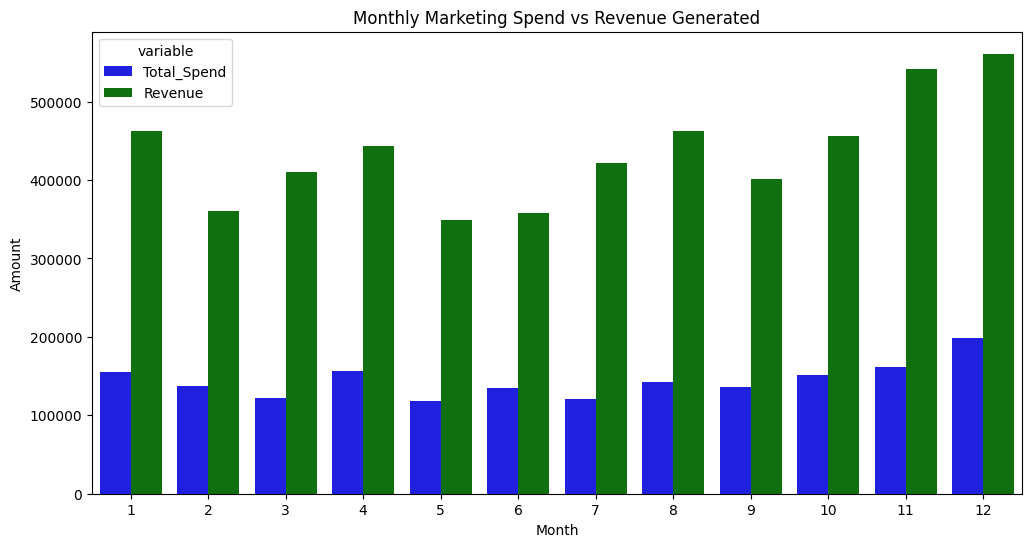


Monthly Marketing Spend:
    Month  Offline_Spend  Online_Spend  Total_Spend
0       1          96600      58328.95    154928.95
1       2          81300      55807.92    137107.92
2       3          73500      48750.09    122250.09
3       4          96000      61026.83    157026.83
4       5          65500      52759.64    118259.64
5       6          80500      53818.14    134318.14
6       7          67500      52717.85    120217.85
7       8          85500      57404.15    142904.15
8       9          83000      52514.54    135514.54
9      10          93500      57724.65    151224.65
10     11          93000      68144.96    161144.96
11     12         122000      76648.75    198648.75

Monthly Revenue:
    Month    Revenue
0       1  462866.90
1       2  360036.40
2       3  410408.03
3       4  443100.16
4       5  349159.59
5       6  358594.96
6       7  421362.00
7       8  462309.94
8       9  401553.82
9      10  455643.16
10     11  541254.55
11     12  561140.18

Market

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
data = marketing_vs_revenue.melt(id_vars='Month', value_vars=['Total_Spend', 'Revenue'])
sns.barplot(data=data, x='Month', y='value', hue='variable', palette=['blue', 'green'])
plt.title('Monthly Marketing Spend vs Revenue Generated')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.show()

print("\nMonthly Marketing Spend:")
print(monthly_marketing)

print("\nMonthly Revenue:")
print(monthly_revenue)

print("\nMarketing Spend vs Revenue:")
print(marketing_vs_revenue)


Based on the previous analysis and this one, there are opportunities to reallocate marketing resources for better results. Months like July (ROI 2.50) and March (ROI 2.36) show higher returns on spend, suggesting that increasing marketing efforts during these months could further boost revenue. Conversely, months like February (ROI 1.63) and December (ROI 1.82) have relatively lower ROI despite higher spend (especially December), indicating that resources could be optimized or shifted from these months to higher-performing periods. Overall, focusing more spend on months with higher ROI while reviewing campaign strategies for lower-performing months could enhance overall marketing efficiency.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 10__

Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

In [177]:
reference_date = onlineSales['Transaction_Date'].max() + pd.Timedelta(days=1)

# Aggregate RFM metrics per customer
rfm = onlineSales.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days,  # Recency: days since last purchase
    'CustomerID': 'count',                                        # Frequency: number of purchases
    'Revenue': 'sum'                                               # Monetary: total revenue per customer
}).rename(columns={
    'Transaction_Date': 'Recency',
    'CustomerID': 'Frequency',
    'Revenue': 'Monetary'
}).reset_index()

# Assign R, F, M scores by quartiles (1 to 4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)  # Lower recency = higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)  # Higher freq = higher score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)  # Higher monetary = higher score

# Combine scores into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define segmentation function
def segment_customer(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Premium'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 2 and row['M_Score'] >= 2:
        return 'Gold'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return 'Silver'
    else:
        return 'Standard'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Display head of RFM table with segments
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'Segment']].head())


   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0       12346      108          2    180.99        3        1        1   
1       12347       60         60  14500.04        3        4        4   
2       12348       74         23   1639.27        3        3        2   
3       12350       18         17   1487.95        4        2        2   
4       12356      108         36   2079.96        3        3        3   

  RFM_Score  Segment  
0       311   Silver  
1       344  Premium  
2       332     Gold  
3       422     Gold  
4       333  Premium  


Premium (High Recency, Frequency, Monetary):
Focus on loyalty programs, exclusive offers, and early access to new products. These are the best customers—reward them to keep them engaged and encourage advocacy.

Gold (High Recency, Medium Frequency & Monetary):
Offer personalized discounts and bundles to nudge them to increase purchase frequency and spend. Use tailored content to deepen their brand connection.

Silver (Medium Recency, Low Frequency & Monetary):
Implement win-back campaigns, such as reminder emails or limited-time offers, to reactivate these customers. Highlight popular products or new arrivals to spark interest.

Standard (Low Recency, Frequency & Monetary):
Focus on educational content, introductory offers, and awareness campaigns to engage these less active customers. Consider surveys to understand their needs and barriers.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 11__

In [178]:
revenue_by_segment = rfm.groupby('Segment')['Monetary'].sum().reset_index()

# Calculate total revenue
total_revenue = revenue_by_segment['Monetary'].sum()

# Calculate percentage contribution
revenue_by_segment['Revenue_Contribution_%'] = (revenue_by_segment['Monetary'] / total_revenue) * 100

print(revenue_by_segment.sort_values(by='Revenue_Contribution_%', ascending=False))

    Segment    Monetary  Revenue_Contribution_%
1   Premium  3167990.84               60.603222
2    Silver   913942.71               17.483596
3  Standard   872744.44               16.695479
0      Gold   272751.70                5.217702


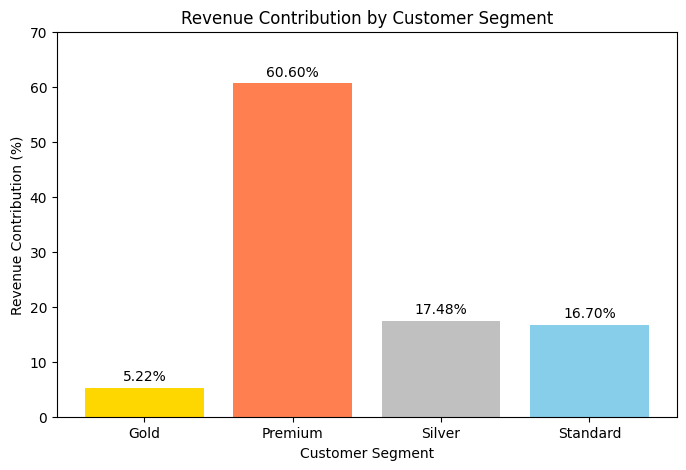

In [179]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
bars = plt.bar(revenue_by_segment['Segment'], revenue_by_segment['Revenue_Contribution_%'], color=['gold', 'coral', 'silver', 'skyblue'])

plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Revenue Contribution (%)')
plt.ylim(0, 70)
plt.bar_label(bars, fmt='%.2f%%', padding=3)

plt.show()


Prioritize Premium and Gold segments with personalized offers, loyalty programs, and exclusive experiences to maximize revenue and retention.

Engage Silver and Standard segments through targeted promotions, educational content, and incentives that encourage more frequent or higher-value purchases.

Use data-driven marketing to tailor messaging and product recommendations based on segment behavior and preferences.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 12__

Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

In [180]:
onlineSales['Transaction_Month'] = onlineSales['Transaction_Date'].dt.to_period('M')

# Calculate each customer's cohort month (first purchase month)
cohort = onlineSales.groupby('CustomerID')['Transaction_Month'].min().reset_index()
cohort.columns = ['CustomerID', 'Cohort_Month']

# Merge cohort info back to onlineSales
onlineSales = onlineSales.merge(cohort, on='CustomerID')

# Calculate months since cohort month (difference in months)
onlineSales['Months_Since_Cohort'] = (onlineSales['Transaction_Month'] - onlineSales['Cohort_Month']).apply(lambda x: x.n)

# Now you can do retention or cohort analysis by grouping:
cohort_data = (
    onlineSales.groupby(['Cohort_Month', 'Months_Since_Cohort'])['CustomerID']
    .nunique()
    .reset_index()
    .rename(columns={'CustomerID': 'Active_Customers'})
)

cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Months_Since_Cohort', values='Active_Customers')

# Calculate retention rate by dividing each month's active customers by the cohort size (month 0)
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Print the first few rows after adding cohort info
print("Cohort Data Sample (first 10 rows):")
print(cohort_data.head(10))

# Print retention pivot table (first 10 rows)
cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Months_Since_Cohort', values='Active_Customers')
print("\nCohort Pivot Table Sample (first 10 rows):")
print(cohort_pivot.head(10))

# Calculate retention rates
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

# Print retention rates (first 10 rows)
print("\nRetention Rates Sample (first 10 rows):")
print(retention.head(10))

# Print summary of retention rates by cohort (mean retention over months)
print("\nMean Retention Rate by Cohort:")
print(retention.mean(axis=1))

# Once you provide these outputs, I can help identify cohorts with highest and lowest retention.


Cohort Data Sample (first 10 rows):
  Cohort_Month  Months_Since_Cohort  Active_Customers
0      2019-01                    0               215
1      2019-01                    1                13
2      2019-01                    2                24
3      2019-01                    3                34
4      2019-01                    4                23
5      2019-01                    5                44
6      2019-01                    6                35
7      2019-01                    7                47
8      2019-01                    8                23
9      2019-01                    9                28

Cohort Pivot Table Sample (first 10 rows):
Months_Since_Cohort     0     1     2     3     4     5     6     7     8   \
Cohort_Month                                                                 
2019-01              215.0  13.0  24.0  34.0  23.0  44.0  35.0  47.0  23.0   
2019-02               96.0   7.0   9.0  16.0  17.0  22.0  19.0  15.0  12.0   
2019-03       

The cohorts from November (55.15%), October (37.16%), and September (28.53%) exhibit the highest retention rates, indicating successful onboarding, promotions, or seasonal campaigns during these months. In contrast, the January (20.93%) and April (20.18%) cohorts show lower retention, suggesting early-year engagement challenges. To improve retention for weaker cohorts, the company can revamp the onboarding experience, ensuring new users realize value quickly. Implementing personalized email follow-ups, loyalty rewards, and targeted re-engagement campaigns can help revive inactive users. Analyzing feedback and drop-off points can also reveal friction in the customer journey. Lastly, replicating strategies from high-retention cohorts may boost performance across all segments.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 13__

Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?

In [181]:
# Ensure Transaction_Date is datetime
onlineSales['Transaction_Date'] = pd.to_datetime(onlineSales['Transaction_Date'])

# Create cohort month and transaction month
onlineSales['Cohort_Month'] = onlineSales.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')
onlineSales['Transaction_Month'] = onlineSales['Transaction_Date'].dt.to_period('M')

# Group by Cohort and Transaction Month to calculate revenue
monthly_revenue_by_cohort = onlineSales.groupby(['Cohort_Month', 'Transaction_Month'])['Avg_Price'].sum().reset_index()

print("Sample Monthly Revenue by Cohort:")
print(monthly_revenue_by_cohort.head(10))


Sample Monthly Revenue by Cohort:
  Cohort_Month Transaction_Month  Avg_Price
0      2019-01           2019-01  250914.85
1      2019-01           2019-02   23940.69
2      2019-01           2019-03   27397.04
3      2019-01           2019-04   33149.74
4      2019-01           2019-05   16895.52
5      2019-01           2019-06   30440.64
6      2019-01           2019-07   36762.71
7      2019-01           2019-08   27609.23
8      2019-01           2019-09   25216.73
9      2019-01           2019-10   28756.37


In [182]:
# Calculate total CLV per cohort
cohort_ltv = monthly_revenue_by_cohort.groupby('Cohort_Month')['Avg_Price'].sum().reset_index()
cohort_ltv.rename(columns={'Avg_Price': 'Lifetime_Value'}, inplace=True)

# Sort to see highest and lowest value cohorts
cohort_ltv_sorted = cohort_ltv.sort_values(by='Lifetime_Value', ascending=False)

print("Customer Lifetime Value by Cohort:")
print(cohort_ltv_sorted)


Customer Lifetime Value by Cohort:
   Cohort_Month  Lifetime_Value
0       2019-01       587889.50
2       2019-03       363388.62
1       2019-02       322678.01
3       2019-04       248260.07
4       2019-05       206670.81
5       2019-06       176934.14
11      2019-12       169102.78
7       2019-08       158243.33
9       2019-10       149239.16
10      2019-11       148892.67
6       2019-07       146851.33
8       2019-09        86474.78


The January 2019 cohort has the highest lifetime value at ₹587,889.50, indicating that customers acquired in this month generated the most revenue over time. In contrast, the September 2019 cohort shows the lowest LTV at ₹86,474.78, suggesting weaker customer engagement or lower repeat purchases. Mid-year cohorts like March and February also perform relatively well, contributing over ₹300K each. The low LTV of later cohorts, particularly from July to September, could be due to lower retention or shorter customer lifespan by year-end. To improve weaker cohorts, businesses should consider personalized re-engagement campaigns, loyalty programs, and post-purchase incentives tailored to customers acquired during slower periods. Additionally, analyzing customer behavior in high-LTV cohorts can reveal best practices that can be replicated across the board.

This insight into customer lifetime value (LTV) by cohort can significantly refine both acquisition and retention strategies. High-LTV cohorts, like those from January and March, indicate that customers acquired in these periods are more valuable—possibly due to better targeting, seasonal demand, or effective onboarding. Marketing efforts can be intensified during such months to acquire similar high-value customers. For lower-LTV cohorts like July to September, businesses should reassess acquisition channels, optimize welcome flows, and deploy retention tactics such as personalized offers or loyalty rewards. Understanding LTV trends also helps allocate budgets more efficiently—investing more in proven periods and strategies, while testing improvements in underperforming ones. This targeted approach ensures higher ROI and sustainable growth.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 14__

Do customers who use coupons have a different average transaction value compared to those who do not?Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?

To determine whether customers who use coupons have a significantly different average transaction value than those who do not, we can perform an independent t-test comparing the two groups:

Null Hypothesis (H₀): There is no significant difference in the average transaction value between coupon users and non-users.

Alternative Hypothesis (H₁): There is a significant difference in the average transaction value between coupon users and non-users.

In [183]:
from scipy.stats import ttest_ind

onlineSales['Coupon_Status'] = onlineSales['Coupon_Status'].str.strip().str.lower()

onlineSales['Transaction_Value'] = (onlineSales['Quantity'] * onlineSales['Avg_Price']) + onlineSales['Delivery_Charges']

coupon_users = onlineSales[onlineSales['Coupon_Status'] == 'used']
non_coupon_users = onlineSales[onlineSales['Coupon_Status'] == 'not used']



# Descriptive stats
print("\nCoupon Users Transaction Value:")
print(coupon_users['Transaction_Value'].describe())

print("\nNon-Coupon Users Transaction Value:")
print(non_coupon_users['Transaction_Value'].describe())

# Perform t-test
t_stat, p_val = ttest_ind(coupon_users['Transaction_Value'], non_coupon_users['Transaction_Value'], equal_var=False)

print(f"\nT-test Result:\nT-statistic = {t_stat:.4f}, P-value = {p_val:.4f}")



Coupon Users Transaction Value:
count    17904.000000
mean        97.648721
std        174.768745
min          4.650000
25%         19.430000
50%         41.700000
75%        129.270000
max      10518.390000
Name: Transaction_Value, dtype: float64

Non-Coupon Users Transaction Value:
count    8094.000000
mean      100.853312
std       175.468589
min         6.400000
25%        19.590000
50%        43.200000
75%       129.270000
max      6002.000000
Name: Transaction_Value, dtype: float64

T-test Result:
T-statistic = -1.3652, P-value = 0.1722


Since the p-value (0.1722) is greater than 0.05, we fail to reject the null hypothesis. This means there is no statistically significant difference in the average transaction value between customers who use coupons and those who don’t.

The statistical analysis shows that coupon users and non-coupon users have similar average transaction values, with no significant difference. This suggests that offering coupons doesn't erode revenue per order, which is a common concern. Instead, coupons can be seen as strategic tools to drive customer acquisition or encourage repeat purchases without compromising the average order value.

For the company, this means it can confidently use targeted discounting strategies—such as issuing coupons to new customers, inactive users, or during slow months—to stimulate engagement and retention. Since coupons don’t significantly lower spending per order, they can help grow the customer base or re-engage dormant users cost-effectively. However, indiscriminate couponing should be avoided to prevent over-reliance and maintain brand value. Instead, a data-driven, segmented coupon strategy would optimize returns.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 15__

Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing

We can conduct the statistical test ANOVA to determine whether purchase behavior (like order frequency or transaction value) varies significantly across different demographic or pricing segments.

In [184]:
from scipy.stats import f_oneway

# Create Delivery Charge Tiers in customerOnlineSales
customerOnlineSales['Delivery_Charge_Tier'] = pd.cut(
    customerOnlineSales['Delivery_Charges'],
    bins=[-1, 20, 50, customerOnlineSales['Delivery_Charges'].max() + 1],
    labels=['Low', 'Medium', 'High']
)

# Define ANOVA test function
def anova_test(data, group_col, target_col):
    groups = [group[target_col].dropna().values for name, group in data.groupby(group_col,observed=False)]
    stat, p = f_oneway(*groups)
    print(f"ANOVA by {group_col} on {target_col}: F = {stat}, p = {p}")

# Run ANOVA tests on customerOnlineSales
anova_test(customerOnlineSales, 'Location', 'Avg_Price')
anova_test(customerOnlineSales, 'Location', 'Quantity')
anova_test(customerOnlineSales, 'Delivery_Charge_Tier', 'Avg_Price')
anova_test(customerOnlineSales, 'Delivery_Charge_Tier', 'Quantity')


ANOVA by Location on Avg_Price: F = 2.7198724069762257, p = 0.027963073394352105
ANOVA by Location on Quantity: F = 1.640801785581798, p = 0.16086857786329958
ANOVA by Delivery_Charge_Tier on Avg_Price: F = 628.3032787934471, p = 2.0921484371121976e-270
ANOVA by Delivery_Charge_Tier on Quantity: F = 989.9634898269626, p = 0.0


These ANOVA results suggest that customers’ average spending varies significantly by location and delivery charge tiers. For locations, since average prices differ, marketing campaigns can be tailored with region-specific promotions or product bundles that match local buying power or preferences. For delivery charge tiers, the strong differences in both spending and quantity indicate that customers sensitive to delivery costs behave distinctly—offering flexible delivery options or tier-based discounts could boost sales and loyalty. Overall, leveraging these insights allows the company to personalize pricing and marketing strategies to better match customer segments, increasing engagement and maximizing revenue.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 16__

Does customer tenure impact purchase frequency?Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?

In [185]:
from scipy.stats import f_oneway

purchase_freq = customerOnlineSales.groupby('CustomerID').Transaction_ID.nunique().reset_index()
purchase_freq.columns = ['CustomerID', 'Purchase_Frequency']

cust_data = pd.merge(purchase_freq, customersData[['CustomerID', 'Tenure_Months']], on='CustomerID', how='left')

bins = [0, 6, 12, 18, np.inf]
labels = ['0-6', '7-12', '13-18', '19+']
cust_data['Tenure_Group'] = pd.cut(cust_data['Tenure_Months'], bins=bins, labels=labels, right=True)

cust_data_clean = cust_data.dropna(subset=['Tenure_Group', 'Purchase_Frequency'])

group_sizes = cust_data_clean.groupby('Tenure_Group',observed=False).size()
print("Group sizes:\n", group_sizes)

valid_groups = group_sizes[group_sizes > 1].index

groups = [group['Purchase_Frequency'].values for name, group in cust_data_clean.groupby('Tenure_Group',observed=False) if name in valid_groups]

if len(groups) > 1:
    F_stat, p_val = f_oneway(*groups)
    print(f"ANOVA test on purchase frequency by tenure group: F = {F_stat:.4f}, p = {p_val:.4f}")
else:
    print("Not enough groups with sufficient data for ANOVA test.")


Group sizes:
 Tenure_Group
0-6      153
7-12     174
13-18    165
19+      976
dtype: int64
ANOVA test on purchase frequency by tenure group: F = 0.6073, p = 0.6103


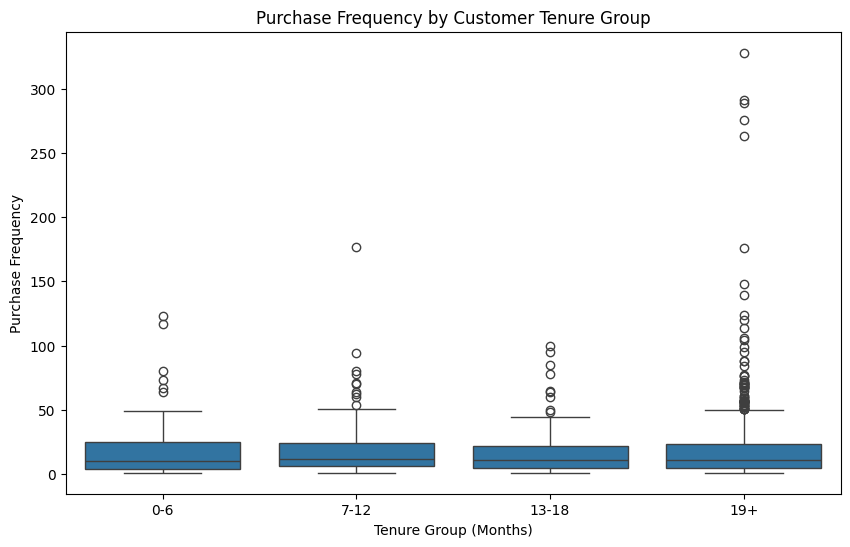

In [186]:
plt.figure(figsize=(10,6))
sns.boxplot(data=cust_data, x='Tenure_Group', y='Purchase_Frequency')
plt.title('Purchase Frequency by Customer Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Purchase Frequency')
plt.show()

The ANOVA results show no significant difference in purchase frequency across different tenure groups (p = 0.6103), indicating that how long a customer has been with the company doesn’t strongly impact how often they buy. This suggests that retention and engagement efforts shouldn’t just focus on tenure but consider other factors like personalized offers, product relevance, or customer experience. Strategies could shift towards identifying behaviors or preferences beyond tenure to better target marketing campaigns, ensuring consistent engagement across all customer segments regardless of how long they’ve been with the company.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 17__

Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?

In [187]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway


# Step 1: Create Delivery Charge Tiers using quantiles, handle duplicate edges
quantiles = pd.qcut(customerOnlineSales['Delivery_Charges'], q=4, duplicates='drop')
num_bins = quantiles.cat.categories.size
labels = ['Tier ' + str(i+1) for i in range(num_bins)]

customerOnlineSales['Delivery_Charge_Tier'] = pd.qcut(
    customerOnlineSales['Delivery_Charges'],
    q=4,
    labels=labels,
    duplicates='drop'
)

# Step 2: Calculate order behavior metrics by delivery charge tier

# Average order value by delivery charge tier
avg_order_value = customerOnlineSales.groupby('Delivery_Charge_Tier',observed=False)['Avg_Price'].mean()

# Average quantity ordered by delivery charge tier
avg_quantity = customerOnlineSales.groupby('Delivery_Charge_Tier',observed=False)['Quantity'].mean()

print("Average Order Value by Delivery Charge Tier:")
print(avg_order_value)
print("\nAverage Quantity by Delivery Charge Tier:")
print(avg_quantity)

# Step 3: Perform ANOVA tests to see if differences in Avg_Price and Quantity by delivery charge tier are significant

# Prepare groups for Avg_Price ANOVA
groups_avg_price = [group['Avg_Price'].dropna().values for name, group in customerOnlineSales.groupby('Delivery_Charge_Tier',observed=False)]

# Prepare groups for Quantity ANOVA
groups_quantity = [group['Quantity'].dropna().values for name, group in customerOnlineSales.groupby('Delivery_Charge_Tier',observed=False)]

# Run ANOVA
f_avg_price, p_avg_price = f_oneway(*groups_avg_price)
f_quantity, p_quantity = f_oneway(*groups_quantity)

print(f"\nANOVA on Avg_Price by Delivery_Charge_Tier: F = {f_avg_price:.4f}, p = {p_avg_price:.4e}")
print(f"ANOVA on Quantity by Delivery_Charge_Tier: F = {f_quantity:.4f}, p = {p_quantity:.4e}")


Average Order Value by Delivery Charge Tier:
Delivery_Charge_Tier
Tier 1    49.892746
Tier 2    66.609453
Tier 3    35.925134
Name: Avg_Price, dtype: float64

Average Quantity by Delivery Charge Tier:
Delivery_Charge_Tier
Tier 1     2.971183
Tier 2     3.427563
Tier 3    10.253788
Name: Quantity, dtype: float64

ANOVA on Avg_Price by Delivery_Charge_Tier: F = 767.5235, p = 0.0000e+00
ANOVA on Quantity by Delivery_Charge_Tier: F = 524.2706, p = 3.4550e-226


The analysis shows significant differences in both average order value and quantity across delivery charge tiers. Notably, Tier 3 (higher delivery charges) has the highest average quantity ordered but the lowest average order value, while Tiers 1 and 2 show the opposite trend.

This suggests an opportunity to optimize delivery pricing by experimenting with tiered or dynamic delivery charges—perhaps lowering delivery fees in Tier 3 could encourage even larger order quantities without substantially hurting revenue per order. Conversely, moderate delivery charges in Tiers 1 and 2 might sustain higher order values while keeping customer costs reasonable.

Tailoring delivery fees based on customer segments or order size, and combining this with targeted promotions, could boost overall revenue and incentivize higher purchase volumes. Monitoring customer response to such pricing tweaks will be key to finding the right balance between delivery costs and maximizing sales.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 18__

Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?

In [188]:
sales_tax = pd.merge(customerOnlineSales, taxAmount, left_on='Product_Category', right_on='Product_Category', how='left')

def create_quantile_bins(series, q=3, base_label='Tier'):
    bins = pd.qcut(series, q=q, duplicates='drop', retbins=True)[1]
    num_bins = len(bins) - 1
    labels = [f"{base_label} {i+1}" for i in range(num_bins)]
    return pd.cut(series, bins=bins, labels=labels, include_lowest=True)

sales_tax['Delivery_Charge_Tier'] = create_quantile_bins(sales_tax['Delivery_Charges'], q=3, base_label='Delivery Charge Tier')
sales_tax['GST_Tier'] = create_quantile_bins(sales_tax['GST'], q=3, base_label='GST Tier')

avg_price_by_delivery = sales_tax.groupby('Delivery_Charge_Tier',observed=False)['Avg_Price'].mean()
avg_quantity_by_delivery = sales_tax.groupby('Delivery_Charge_Tier',observed=False)['Quantity'].mean()

avg_price_by_gst = sales_tax.groupby('GST_Tier',observed=False)['Avg_Price'].mean()
avg_quantity_by_gst = sales_tax.groupby('GST_Tier',observed=False)['Quantity'].mean()

print("Average Order Value by Delivery Charge Tier:")
print(avg_price_by_delivery)
print("\nAverage Quantity by Delivery Charge Tier:")
print(avg_quantity_by_delivery)

print("\nAverage Order Value by GST Tier:")
print(avg_price_by_gst)
print("\nAverage Quantity by GST Tier:")
print(avg_quantity_by_gst)

groups_delivery_price = [group['Avg_Price'].dropna().values for name, group in sales_tax.groupby('Delivery_Charge_Tier',observed=False)]
groups_delivery_qty = [group['Quantity'].dropna().values for name, group in sales_tax.groupby('Delivery_Charge_Tier',observed=False)]

f_delivery_price, p_delivery_price = f_oneway(*groups_delivery_price)
f_delivery_qty, p_delivery_qty = f_oneway(*groups_delivery_qty)

groups_gst_price = [group['Avg_Price'].dropna().values for name, group in sales_tax.groupby('GST_Tier',observed=False)]
groups_gst_qty = [group['Quantity'].dropna().values for name, group in sales_tax.groupby('GST_Tier',observed=False)]

f_gst_price, p_gst_price = f_oneway(*groups_gst_price)
f_gst_qty, p_gst_qty = f_oneway(*groups_gst_qty)

print(f"\nANOVA on Avg_Price by Delivery_Charge_Tier: F = {f_delivery_price:.4f}, p = {p_delivery_price:.4g}")
print(f"ANOVA on Quantity by Delivery_Charge_Tier: F = {f_delivery_qty:.4f}, p = {p_delivery_qty:.4g}")
print(f"ANOVA on Avg_Price by GST_Tier: F = {f_gst_price:.4f}, p = {p_gst_price:.4g}")
print(f"ANOVA on Quantity by GST_Tier: F = {f_gst_qty:.4f}, p = {p_gst_qty:.4g}")

Average Order Value by Delivery Charge Tier:
Delivery_Charge_Tier
Delivery Charge Tier 1    49.892746
Delivery Charge Tier 2    66.609453
Delivery Charge Tier 3    35.925134
Name: Avg_Price, dtype: float64

Average Quantity by Delivery Charge Tier:
Delivery_Charge_Tier
Delivery Charge Tier 1     2.971183
Delivery Charge Tier 2     3.427563
Delivery Charge Tier 3    10.253788
Name: Quantity, dtype: float64

Average Order Value by GST Tier:
GST_Tier
GST Tier 1    90.132951
GST Tier 2    17.110155
Name: Avg_Price, dtype: float64

Average Quantity by GST Tier:
GST_Tier
GST Tier 1    5.119368
GST Tier 2    3.921318
Name: Quantity, dtype: float64

ANOVA on Avg_Price by Delivery_Charge_Tier: F = 767.5235, p = 0
ANOVA on Quantity by Delivery_Charge_Tier: F = 524.2706, p = 3.455e-226
ANOVA on Avg_Price by GST_Tier: F = 25472.6238, p = 0
ANOVA on Quantity by GST_Tier: F = 46.9569, p = 7.336e-12


The analysis reveals that delivery charges and tax rates significantly influence customer spending behavior. Customers facing moderate delivery fees tend to place higher-value orders, while those with higher delivery charges buy more items but spend less per item on average. This suggests that adjusting delivery fees—such as offering free shipping thresholds—could encourage larger purchases without deterring volume. Additionally, products with higher GST rates see lower average spending and quantities, indicating price sensitivity in these categories. Targeted promotions or bundling in high-tax categories may help mitigate this effect. Overall, personalized pricing strategies that consider delivery charges and tax impacts can improve customer satisfaction and boost revenue. Implementing these strategies can optimize both order value and purchase frequency.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 19__

Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

Merged Data Shape: (52924, 21)
   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ... Month  \
0         1     153.71               6.5          used  ...     

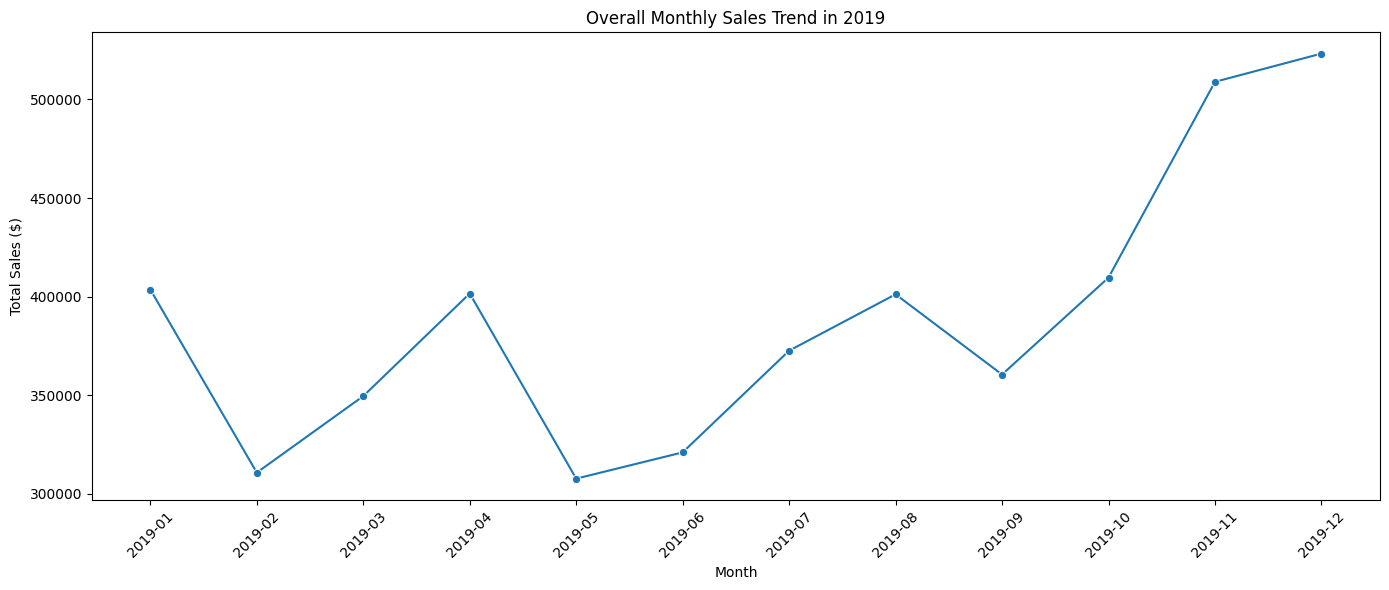

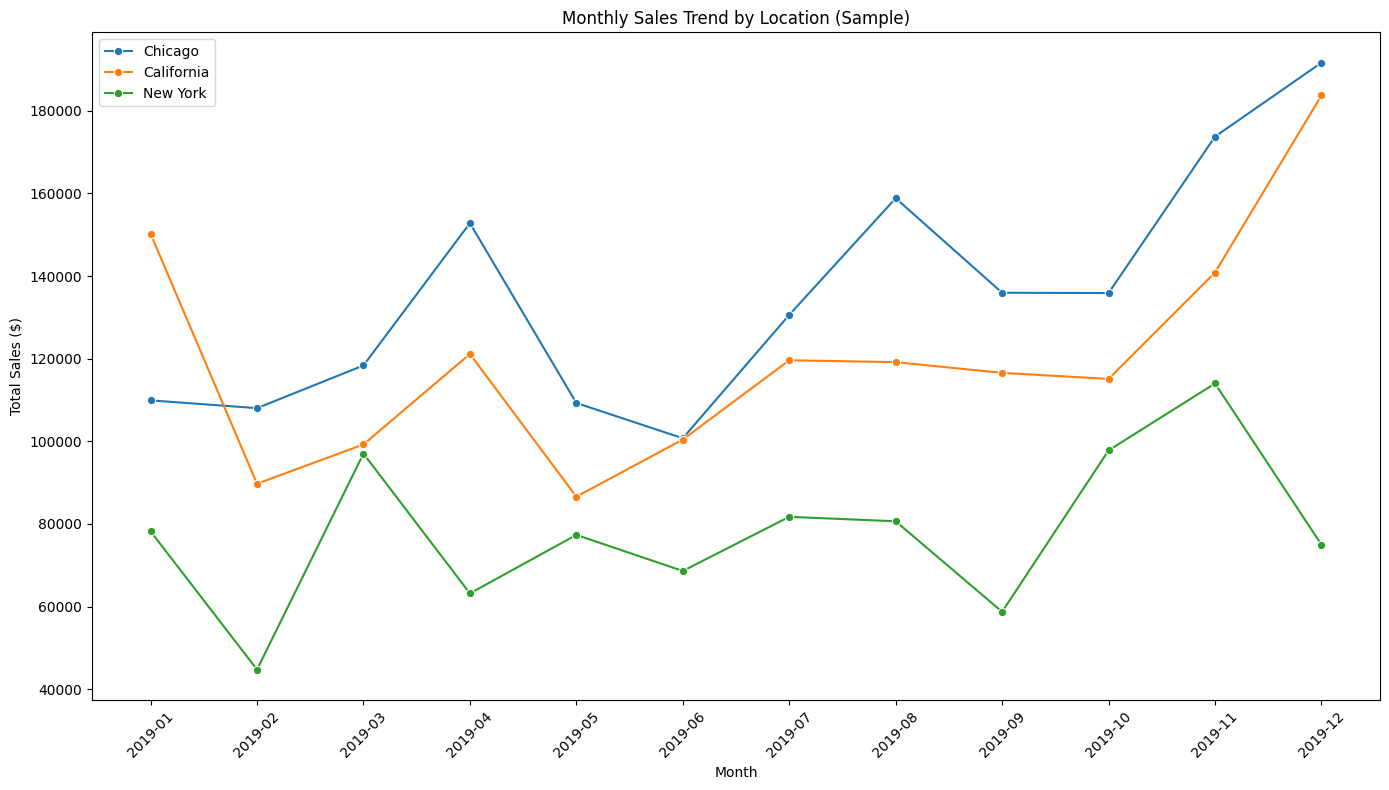

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customerOnlineSales = pd.merge(onlineSales, customersData, on='CustomerID')
print("Merged Data Shape:", customerOnlineSales.shape)
print(customerOnlineSales.head())

print("\nConverting Transaction_Date to datetime and extracting Month...")
customerOnlineSales['Transaction_Date'] = pd.to_datetime(customerOnlineSales['Transaction_Date'])
customerOnlineSales['Month'] = customerOnlineSales['Transaction_Date'].dt.to_period('M').astype(str)

unique_months = customerOnlineSales['Month'].unique()
print("Sample of 'Month' column values:")
print(unique_months)

print("\nCalculating total sales per transaction row...")
customerOnlineSales['Total_Sales'] = customerOnlineSales['Quantity'] * customerOnlineSales['Avg_Price']
print("Sample Total_Sales values:")
print(customerOnlineSales[['Quantity', 'Avg_Price', 'Total_Sales']].head())

print("\nAggregating total sales by Month, Product_Category, and Location...")
monthly_sales = customerOnlineSales.groupby(['Month', 'Product_Category', 'Location'], as_index=False)['Total_Sales'].sum()
print("Aggregated Monthly Sales shape:", monthly_sales.shape)
print(monthly_sales.head())

print("\nAggregating overall total sales by Month to identify peak months...")
overall_monthly_sales = customerOnlineSales.groupby('Month', as_index=False)['Total_Sales'].sum()
overall_monthly_sales_sorted = overall_monthly_sales.sort_values(by='Total_Sales', ascending=False)
print("Top 5 peak months overall by total sales:")
print(overall_monthly_sales_sorted.head())

print("\nIdentifying top 3 peak months by Location...")
locations = monthly_sales['Location'].unique()
for loc in locations:
    loc_sales = monthly_sales[monthly_sales['Location'] == loc].groupby('Month', as_index=False)['Total_Sales'].sum()
    loc_top3 = loc_sales.sort_values(by='Total_Sales', ascending=False).head(3)
    print(f"\nLocation: {loc}")
    print(loc_top3)

print("\nIdentifying top 3 peak months by Product_Category...")
categories = monthly_sales['Product_Category'].unique()
for cat in categories:
    cat_sales = monthly_sales[monthly_sales['Product_Category'] == cat].groupby('Month', as_index=False)['Total_Sales'].sum()
    cat_top3 = cat_sales.sort_values(by='Total_Sales', ascending=False).head(3)
    print(f"\nProduct Category: {cat}")
    print(cat_top3)

plt.figure(figsize=(14,6))
sns.lineplot(data=overall_monthly_sales, x='Month', y='Total_Sales', marker='o')
plt.title('Overall Monthly Sales Trend in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
sample_locations = locations[:3]  

for loc in sample_locations:
    loc_sales = monthly_sales[monthly_sales['Location'] == loc].groupby('Month', as_index=False)['Total_Sales'].sum()
    sns.lineplot(data=loc_sales, x='Month', y='Total_Sales', marker='o', label=loc)

plt.title('Monthly Sales Trend by Location (Sample)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


To maximize revenue during peak and off-peak seasons, the company should leverage data-driven insights from sales trends. During peak months like December and November, they can increase inventory, ramp up marketing campaigns, and offer premium or bundled products to capitalize on high demand. In off-peak months, targeted promotions, discounts, and personalized offers can stimulate customer engagement and boost sales. They should also optimize staffing and logistics to reduce costs when sales are lower. Additionally, analyzing location- and category-specific trends allows tailoring strategies for regional preferences. Investing in customer loyalty programs can improve retention across all seasons. Ultimately, balancing aggressive growth in peak times with smart incentives in slow months ensures steady revenue flow year-round.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

__Question 20__

Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

Converting 'Transaction_Date' to datetime...
Calculating Total_Sales per row...
Aggregating total sales by day...
Sample daily sales data:
  Transaction_Date  Total_Sales
0       2019-01-01      7380.49
1       2019-01-02     13438.47
2       2019-01-03     23834.21
3       2019-01-04     16603.41
4       2019-01-05     17373.19


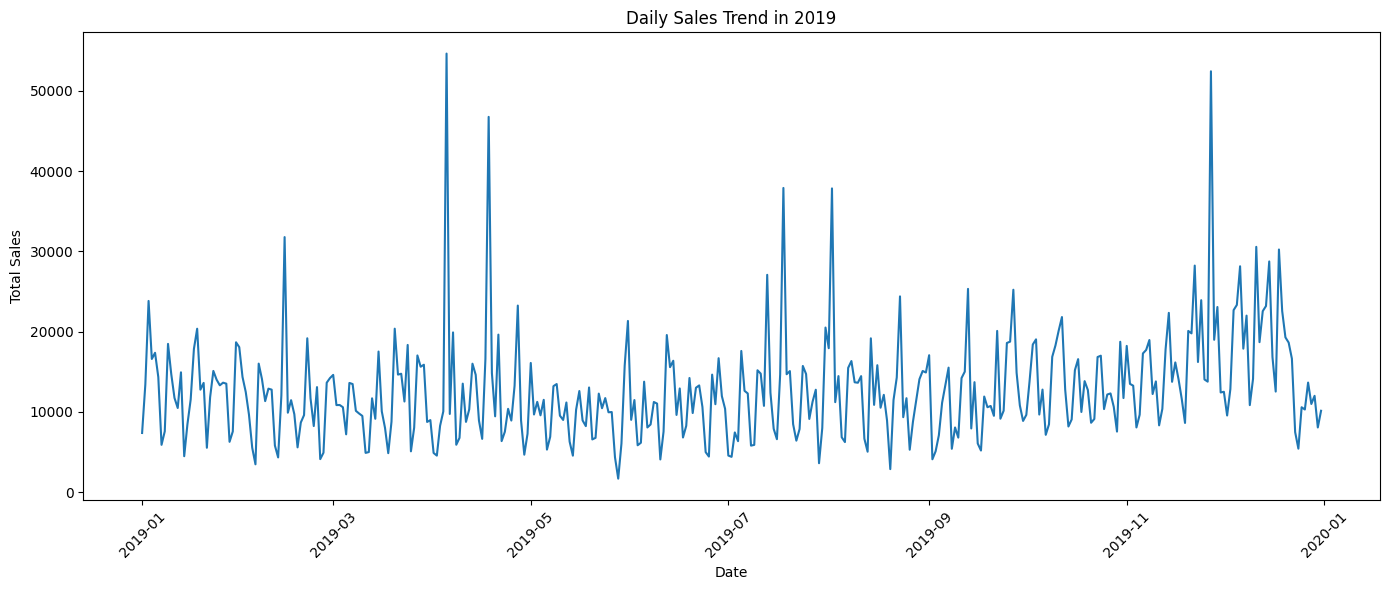

High-performing day threshold (75th percentile): 15205.75
Low-performing day threshold (25th percentile): 8653.83
Number of high-performing days: 92
Number of low-performing days: 92

Sample high-performing days:
   Transaction_Date  Total_Sales
2        2019-01-03     23834.21
3        2019-01-04     16603.41
4        2019-01-05     17373.19
8        2019-01-09     18482.71
16       2019-01-17     17860.91

Sample low-performing days:
   Transaction_Date  Total_Sales
0        2019-01-01      7380.49
6        2019-01-07      5905.04
7        2019-01-08      7585.60
13       2019-01-14      4484.37
14       2019-01-15      8485.78


In [ ]:


customerOnlineSales['Transaction_Date'] = pd.to_datetime(customerOnlineSales['Transaction_Date'])
customerOnlineSales['Total_Sales'] = customerOnlineSales['Quantity'] * customerOnlineSales['Avg_Price']
daily_sales = customerOnlineSales.groupby('Transaction_Date')['Total_Sales'].sum().reset_index()
s
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='Transaction_Date', y='Total_Sales')
plt.title('Daily Sales Trend in 2019')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

high_threshold = daily_sales['Total_Sales'].quantile(0.75)
low_threshold = daily_sales['Total_Sales'].quantile(0.25)

print(f"High-performing day threshold (75th percentile): {high_threshold:.2f}")
print(f"Low-performing day threshold (25th percentile): {low_threshold:.2f}")

high_performing_days = daily_sales[daily_sales['Total_Sales'] >= high_threshold]
low_performing_days = daily_sales[daily_sales['Total_Sales'] <= low_threshold]

print(f"Number of high-performing days: {len(high_performing_days)}")
print(f"Number of low-performing days: {len(low_performing_days)}")

print("\nSample high-performing days:")
print(high_performing_days.head())

print("\nSample low-performing days:")
print(low_performing_days.head())


To boost sales on slower days, the company should implement targeted promotions and exclusive discounts that create urgency and attract price-sensitive customers. Personalized marketing campaigns can leverage customer data to send relevant offers and product recommendations timed specifically for off-peak periods. Bundling products into attractive packages encourages higher spending per transaction, while engaging content such as social media contests or tutorials can keep customers interested and connected. Additionally, shifting advertising budgets to focus on slow days helps drive more traffic when it’s needed most. Introducing limited-edition products or special launches during these times can generate excitement and increase demand. Improving customer experience through perks like free shipping or loyalty rewards further incentivizes purchases. Altogether, these strategies help balance revenue across the year and reduce dependence on peak seasons. By carefully analyzing sales data and adapting marketing efforts, the company can sustain growth and profitability year-round.

<span style="color:white">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>